# Analysis of Produce Sales at a Grocery Store

### Apratim Biswas

In [112]:
import sys
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
import joblib
from joblib import dump

In [113]:
df_data=pd.read_csv("../Dunnhumby-The_Complete_Journey-Data Prep/data/all_tables_combined.csv")   #read data from all_tables_combined.csv

In [114]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [115]:
#df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]
#df_s_parent=df_data

In [116]:
#determining length of campaign and dropping unnecessary columns.

df_data['NUM_DAYS']=df_data['END_DAY'] - df_data['START_DAY'] + 1
df_data.drop(['START_DAY','END_DAY','COUPON_UPC','household_key','PRODUCT_ID'], axis=1, inplace=True)

In [117]:
df_data.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48


In [118]:
#sns.pairplot(df_data)

In [119]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
2,1,1.89,414,0.00,1111,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
3,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
4,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,18,603,...,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ,56
112018,2,3.70,402,0.00,1334,0.0,0.0,TypeA,8,438,...,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ,49
112019,1,5.49,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56
112020,1,5.59,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56


Let's compute discount percent and then drop all rows with NA.

In [120]:
df_data['DISCOUNT_PCT']=(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC'])*100/(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC']+df_data['SALES_VALUE'])
df_data['DISCOUNT_PCT']=~df_data['DISCOUNT_PCT'].isna()
df_data['DISCOUNT_PCT'].isna().sum()

0

In [121]:
df_data['description'].value_counts()   #number of transactions belonging to campaign within each type of campaign.

TypeA    105537
TypeB      5972
TypeC       513
Name: description, dtype: int64

In [122]:
df_data.columns

Index(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN', 'DAY',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT', 'NUM_DAYS',
       'DISCOUNT_PCT'],
      dtype='object')

Let's take a look at the most frequent commodities in the dataset.

In [123]:
df_data['COMMODITY_DESC'].value_counts()

FLUID MILK PRODUCTS          6210
BEEF                         5660
FRZN MEAT/MEAT DINNERS       5620
YOGURT                       5403
TROPICAL FRUIT               3832
                             ... 
PWDR/CRYSTL DRNK MX             1
HALLOWEEN                       1
WATCHES/CALCULATORS/LOBBY       1
FALL AND WINTER SEASONAL        1
RW FRESH PROCESSED MEAT         1
Name: COMMODITY_DESC, Length: 215, dtype: int64

In [124]:
df_data['COMMODITY_DESC'].unique()

array(['CHEESE', 'GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES',
       'FLUID MILK PRODUCTS', 'VEGETABLES - ALL OTHERS',
       'MILK BY-PRODUCTS', 'COLD CEREAL', 'SEAFOOD-FRESH', 'EGGS',
       'TROPICAL FRUIT', 'FLORAL-FRESH CUT', 'FROZEN PIZZA',
       'PASTA SAUCE', 'FRZN MEAT/MEAT DINNERS', 'FROZEN PIE/DESSERTS',
       'FROZEN BREAD/DOUGH', 'SALAD BAR', 'CHICKEN', 'MARGARINES',
       'BACON', 'BEEF', 'PORK', 'REFRGRATD JUICES/DRNKS',
       'FRUIT - SHELF STABLE', 'REFRGRATD DOUGH PRODUCTS', 'LUNCHMEAT',
       'MEAT - MISC', 'HOT DOGS', 'SWEET GOODS & SNACKS', 'BERRIES',
       'YOGURT', 'ICE CREAM/MILK/SHERBTS', 'TURKEY',
       'BROCCOLI/CAULIFLOWER', 'MOLASSES/SYRUP/PANCAKE MIXS', 'CITRUS',
       'APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'SEAFOOD - FROZEN',
       'VEAL', 'LAXATIVES', 'ORAL HYGIENE PRODUCTS', 'COLD AND FLU',
       'MAKEUP AND TREATMENT', 'ANALGESICS', 'SOFT DRINKS', 'CARROTS',
       'PICKLE/RELISH/PKLD VEG', 'DINNER SAUSAGE',
       'FRZN NOVELTIES/WTR I

Here's the list of commodities to include in produce:

['GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES', 'VEGETABLES - ALL OTHERS', 'TROPICAL FRUIT','SALAD BAR', 'REFRGRATD JUICES/DRNKS', 'FRUIT - SHELF STABLE','BERRIES','BROCCOLI/CAULIFLOWER','CITRUS','APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'CARROTS', 'POTATOES', 'ONIONS','FRZN VEGETABLE/VEG DSH', 'VALUE ADDED FRUIT', 'JUICE','PEARS','ORGANICS FRUIT & VEGETABLES','CORN','MUSHROOMS', 'HERBS', 'CANNED JUICES', 'SQUASH', 'VEGETABLES - SHELF STABLE', 'VALUE ADDED VEGETABLES', 'STONE FRUIT', 'FRZN JCE CONC/DRNKS', 'SALADS/DIPS','GIFT & FRUIT BASKETS']

In [125]:
produce_list=['GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES', 'VEGETABLES - ALL OTHERS', 'TROPICAL FRUIT','SALAD BAR', 'REFRGRATD JUICES/DRNKS', 'FRUIT - SHELF STABLE','BERRIES','BROCCOLI/CAULIFLOWER','CITRUS','APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'CARROTS', 'POTATOES', 'ONIONS','FRZN VEGETABLE/VEG DSH', 'VALUE ADDED FRUIT', 'JUICE','PEARS','ORGANICS FRUIT & VEGETABLES','CORN','MUSHROOMS', 'HERBS', 'CANNED JUICES', 'SQUASH', 'VEGETABLES - SHELF STABLE', 'VALUE ADDED VEGETABLES', 'STONE FRUIT', 'FRZN JCE CONC/DRNKS', 'SALADS/DIPS','GIFT & FRUIT BASKETS']

In [126]:
df_data=df_data[df_data['COMMODITY_DESC'].isin(produce_list)]

Let's take a look at the most frequent sub-commodities in the dataset.

In [127]:
df_data['SUB_COMMODITY_DESC'].value_counts()

BANANAS                           3274
DAIRY CASE 100% PURE JUICE - O    2063
FRZN BAGGED VEGETABLES - PLAIN    1284
STRAWBERRIES                      1031
CARROTS MINI PEELED                871
                                  ... 
PROCESSED SALAD                      1
FRUIT PARTY TRAY                     1
VEG JUICE (EXCEPT TOMATO) (50%       1
ORGANIC MUSHROOMS                    1
VEGETABLE SALADS - PREPACK           1
Name: SUB_COMMODITY_DESC, Length: 208, dtype: int64

In [128]:
df_data.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN',
       'DAY', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'NUM_DAYS', 'DISCOUNT_PCT'], dtype=object)

In [129]:
df_data.drop(['TRANS_TIME','AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC','DISCOUNT_PCT'], axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
7,1,1.45,414,0.00,0.0,0.0,TypeA,18,599,2,National,GRAPES RED,18 LB,56
8,1,1.49,414,-0.50,0.0,0.0,TypeA,18,599,2,National,GRAPES RED,18 LB,56
9,1,4.28,414,0.00,0.0,0.0,TypeA,18,599,2,National,GRAPES RED,18 LB,56
10,1,2.08,414,-1.47,0.0,0.0,TypeA,18,599,2,National,GRAPES RED,18 LB,56
11,1,1.84,414,-1.27,0.0,0.0,TypeA,18,599,2,National,GRAPES RED,18 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111964,1,1.67,420,-0.12,0.0,0.0,TypeA,8,424,282,National,FRZN BOXED VEGETABLES- VALUE A,10OZ,49
111971,1,1.12,389,0.00,0.0,0.0,TypeA,18,606,2,National,POTATOES RED (BULK&BAG),,56
111972,0,0.00,389,0.00,0.0,0.0,TypeA,18,606,2,National,PEACHES YELLOW FLESH,64 CT,56
111992,1,3.67,404,0.00,0.0,0.0,TypeA,18,598,2,National,APPLES OTHER (BULK&BAG),,56


In [131]:
df_data['CURR_SIZE_OF_PRODUCT'].value_counts()

            7285
40 LB       4260
16 OZ       2182
1 LB        1654
18 LB       1469
            ... 
450ML          1
20 LBS         1
7.25 LBS       1
.35 OZ         1
13.5 OZ        1
Name: CURR_SIZE_OF_PRODUCT, Length: 181, dtype: int64

# The section below is from the notebook analyzing liquid milk products. Needs to be updated with data relevant to produce.

In [21]:
def label_to_volume(label):
    volume=int()
    if label=='1 GA':
        volume=128
    elif label=='1 PT':
        volume=16
    elif label=='16 OZ':
        volume=16
    elif label=='1 QT':
        volume=32
    elif label=='PT':
        volume=16
        
    return volume

vect_label_to_volume=np.vectorize(label_to_volume)

In [22]:
df_data['VOLUME']=vect_label_to_volume(df_data['CURR_SIZE_OF_PRODUCT'])
df_data.head()

<ipython-input-22-8553da09263f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['VOLUME']=vect_label_to_volume(df_data['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME
72,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
73,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
74,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
75,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
76,1,1.67,414,-0.82,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128


In [23]:
df_data.groupby('CAMPAIGN').sum()

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY,MANUFACTURER,NUM_DAYS,VOLUME
CAMPAIGN,,,,,,,,,,
8,4414,7395.21,11526800,-2260.05,-6.09,-1.40,1038395,253625,119119,165888
13,2651,4388.69,5413378,-1344.57,-7.52,-0.45,839104,235690,78096,88576
18,1474,2299.86,917666,-798.35,-4.54,-1.45,419973,71762,39032,42960


In [24]:
df_data=df_data[(df_data['SALES_VALUE']<=8)&(df_data['SALES_VALUE']>0)]

In [25]:
sales=df_data['SALES_VALUE']

In [26]:
df_data_features=df_data.drop('SALES_VALUE', axis=1)

In [27]:
dummy=pd.get_dummies(df_data_features['BRAND'],drop_first=True)
dummy_milk_type=pd.get_dummies(df_data_features['SUB_COMMODITY_DESC'],drop_first=True)
#dummy_hh_size_desc=pd.get_dummies(df_s_parent_features['HOUSEHOLD_SIZE_DESC'],drop_first=True)
dummy_manufacturer=pd.get_dummies(df_data_features['MANUFACTURER'],drop_first=True)
df_data_features=pd.concat([df_data_features,dummy], axis=1)
df_data_features=pd.concat([df_data_features,dummy_milk_type], axis=1)
#df_s_parent_features=pd.concat([df_s_parent_features,dummy_hh_size_desc], axis=1)
df_data_features=pd.concat([df_data_features,dummy_manufacturer], axis=1)
df_data_features.columns

Index([             'QUANTITY',              'STORE_ID',
                 'RETAIL_DISC',           'COUPON_DISC',
           'COUPON_MATCH_DISC',           'description',
                    'CAMPAIGN',                   'DAY',
                'MANUFACTURER',                 'BRAND',
          'SUB_COMMODITY_DESC',  'CURR_SIZE_OF_PRODUCT',
                    'NUM_DAYS',                'VOLUME',
                     'Private', 'FLUID MILK WHITE ONLY',
          'MISCELLANEOUS MILK',                     531,
                           709,                     865,
                           926,                     927,
                          1078,                    1453,
                          1487,                    1543,
                          5423],
      dtype='object')

In [28]:
df_data_features.drop(['STORE_ID','QUANTITY','BRAND','description','MANUFACTURER','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

We want to include variables that are not strongly correlated. Seaborn's heatmap method is perfect for visualizing the inter-relationships between variables.

<AxesSubplot:>

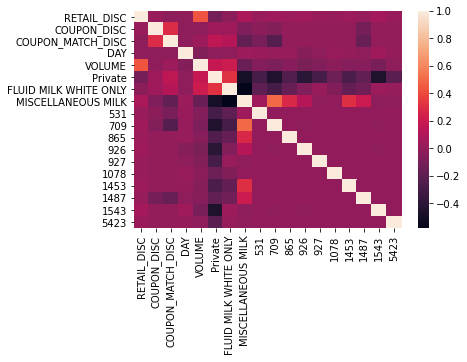

In [29]:
sns.heatmap(df_data_features.corr())

In [30]:
df_data_features.columns.values

array(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'DAY', 'VOLUME',
       'Private', 'FLUID MILK WHITE ONLY', 'MISCELLANEOUS MILK', 531, 709,
       865, 926, 927, 1078, 1453, 1487, 1543, 5423], dtype=object)

In [31]:
X=df_data_features
y=sales

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

Instantiate StandardScaler and save scaling data.

In [33]:
sscaler=StandardScaler()

In [34]:
X_train_scaled=sscaler.fit_transform(X_train)
dump(sscaler,'./models/scaler_file.save')

X_test_scaled=sscaler.fit_transform(X_test)

In [35]:
X_test_scaled

array([[ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       ...,
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        10.22474716, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065]])

In [78]:
neigh = KNeighborsRegressor(n_neighbors=7)

In [79]:
neigh.fit(X_train_scaled, np.log(y_train))

KNeighborsRegressor(n_neighbors=7)

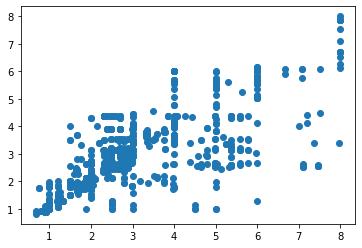

In [80]:
y_preds=neigh.predict(X_test_scaled)
plt.scatter(y_test,np.exp(y_preds))

In [81]:
np.mean(cross_val_score(neigh, X_test_scaled,np.log(y_test)))

0.6847709254534265

In [82]:
lasso=Lasso(alpha=0.00001,max_iter=99999)
lasso.fit(X_train_scaled,np.log(y_train))

Lasso(alpha=1e-05, max_iter=99999)

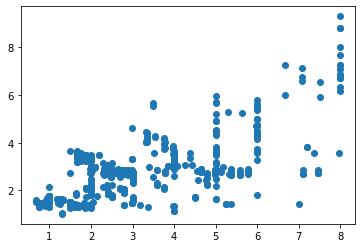

In [37]:
y_preds=np.exp(lasso.predict(X_test_scaled))
plt.scatter(y_test,y_preds)

/home/user-1711/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_VALUE'>

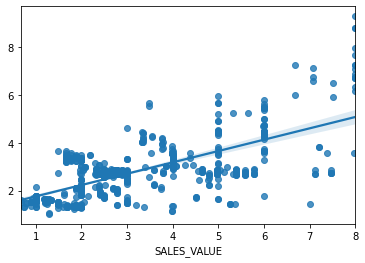

In [38]:
sns.regplot(y_test,y_preds)

In [39]:
features_and_coefs=pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)
features_and_coefs #.features.values

,features,coefs
4,VOLUME,0.358467
16,1543,0.091982
7,MISCELLANEOUS MILK,0.073165
11,926,0.065984
12,927,0.054736
13,1078,0.027690
3,DAY,0.019208
2,COUPON_MATCH_DISC,0.015641
15,1487,0.014913
6,FLUID MILK WHITE ONLY,0.014789


In [40]:
X_test_scaled[0]

array([ 0.63391054,  0.0569051 ,  0.04942204,  1.72126429, -0.73565356,
        0.21435005,  0.31532811, -0.19847223, -0.06576671, -0.11440719,
       -0.04154065, -0.09320996, -0.04154065, -0.02936101,  0.        ,
       -0.05089866, -0.09780193, -0.04154065])

In [41]:
cross_val_score(lasso, X_train_scaled,np.log(y_train))

array([0.48892423, 0.49725852, 0.49222139, 0.5417816 , 0.45591951])

In [42]:
cross_val_score(lasso, X_test_scaled,np.log(y_test))

array([0.48133518, 0.41879741, 0.52471888, 0.46105774, 0.47801642])

Next we'll try to estimate using ridge instead of lasso and see hot it performs.

In [43]:
ridge=Ridge()
ridge.fit(X_train_scaled,np.log(y_train))

Ridge()

In [44]:
y_ridge_preds=np.exp(ridge.predict(X_test_scaled))

In [45]:
cross_val_score(ridge, X_test_scaled,np.log(y_test))

array([0.48368774, 0.41889891, 0.52452018, 0.46111541, 0.48377427])

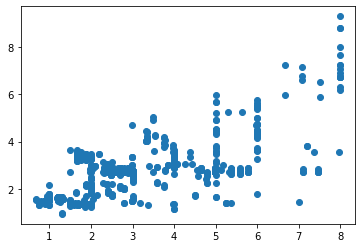

In [46]:
plt.scatter(y_test,y_ridge_preds)

Finally we save both models

In [47]:
dump(lasso, './models/sales_value_lasso_model.joblib')

['./models/sales_value_lasso_model.joblib']

In [48]:
dump(ridge, './models/sales_value_ridge_model.joblib')

['./models/sales_value_ridge_model.joblib']